# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import binom
import seaborn as sns
import numpy as np

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [4]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""
p = 0.6
q = 0.4

Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [5]:
# 1) P(A) * P(A) * P(A) * P(A) * P(A) 
# 2) P(A)^5 * P(O)^15 

print('1) ',round(p**5 *100,2),'%')
print('2) ',round(p**5 * q**15 *100,2),'%')

1)  7.78 %
2)  0.0 %


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [6]:
'''
Probability of getting 5 apples:
P(x = 5)

Binomial, out of 20 trials with 0.6 probability
x ~ B(20,0.6) 
'''
n= 20
p= 0.6
x= 5

binomial = binom(n,p)

# probability that x = 5
print(binomial.pmf(x))

0.0012944935222876511


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [7]:
# probability that x < 5
print(binomial.cdf(4))

0.0003170311211686301


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

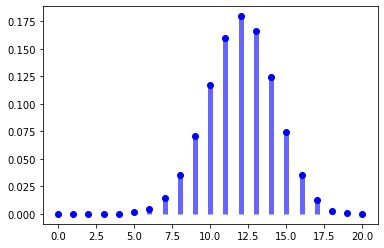

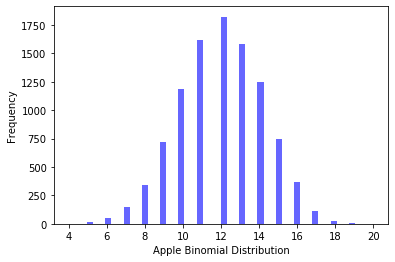

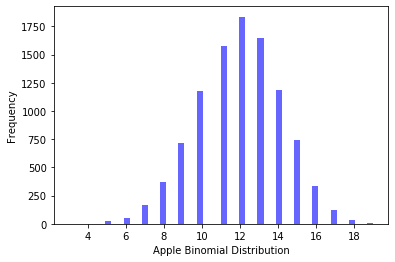

In [8]:
# EXAMPLE IN CLASS
# QUES-Is this the probability of each case? WIthout randomness?
# QUES-In the class we were doing prob of each case from 0 to 10. Why do I have a lot of values here?
x = np.arange(0,n+1, dtype="int") #QUES-What's this +1 doing here?
plt.plot(x, binom.pmf(x, n, p), 'bo')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='blue', lw=5, alpha=0.6)
plt.show()

# MY SOLUTION
# QUES-And is it this taking random samples from binomial distribution??
my_solution = np.random.binomial(n, p, 10000) #QUES-If I make this last number smaller I get less bars. Why?

ax = sns.distplot(my_solution,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth":0.1,'alpha':0.6})
ax.set(xlabel='Apple Binomial Distribution', ylabel='Frequency')
plt.show()

# ANOTHER SOLUTION ONLINE- QUES-What's the difference between the 3?
data_binom = binom.rvs(n=n,p=p,size=10000)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='blue',
                  hist_kws={"linewidth":0.1,'alpha':0.6})
ax.set(xlabel='Apple Binomial Distribution', ylabel='Frequency')
plt.show()


## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [40]:
import math
from scipy.stats import poisson
'''
QUES- I don't get the difference between my result using this formula and the online calculator
which gives the following result: Poisson Probability: P(X = 5)	0.06680
https://stattrek.com/online-calculator/poisson.aspx
'''
mu = 2.3
x = 5

poisson_prob = math.exp(-mu)*mu**x/math.factorial(x)

print("Probability of 5 goals in a match:", poisson_prob)
# QUES - Is there a way of doing this with any python library?

Probability of 5 goals in a match: 0.0537750255819468


In [44]:
# Option 2 - with python library

poisson_prob = poisson.pmf(x, mu)
print("Probability of 5 goals in a match:",poisson_prob)

Probability of 5 goals in a match: 0.053775025581946814


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

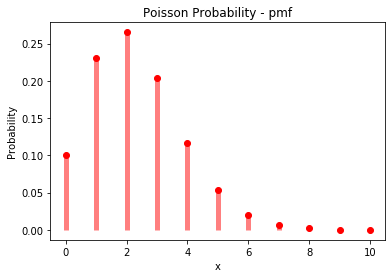

In [74]:
# OPTION 1 - With regular math
x = np.arange(0, 10+1, 1)
poisson_prob = np.exp(-mu)*np.power(mu, t)/factorial(t)


plt.plot(x, d, 'ro')
plt.vlines(x, 0, d, colors='r', lw=5, alpha=0.5)
plt.xlabel('x')
plt.title('Poisson Probability - pmf')
plt.ylabel('Probability')
plt.show()

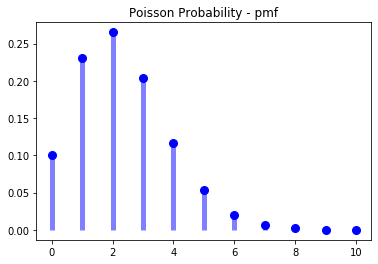

In [75]:
# OPTION 2 - Class example

# QUES - Why where we using the following line in the example? I guess the example is from here too but I don't undestand it
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

# Dont get what is going on in the following line
x = np.arange(poisson.ppf(0.00001, mu), poisson.ppf(0.9999, mu)+1)

plt.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
plt.title('Poisson Probability - pmf')
plt.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

In [76]:
# QUES- Here all the values I dont undestand 😢
print(poisson.ppf(0.00001, mu))
print(poisson.ppf(0.9999, mu))

print(poisson.stats(mu, moments='mvsk'))

0.0
10.0
(array(2.3), array(2.3), array(0.65938047), array(0.43478261))
